In [1]:
#!pip install gekko
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from gekko import GEKKO

In [7]:
def plot(x, ys, title, labels):
    fig = go.Figure()
    fig.update_layout(
        #width=700, height=700, 
        title=title
    )
    
    for i in range(len(ys)):
        fig.add_trace(go.Scatter(x=x, y=ys[i],
                                mode='lines',
                                name=labels[i]))
    fig.show()

In [8]:
#Initialize model
m = GEKKO(remote=False)

#time array
m.time = np.arange(0, 100, 1)

#define constants
g_p = m.Const(value=0.0)
g_a = m.Const(value=0.0)
delta = m.Const(value=0.4)
alpha = m.Const(value=0.3)
s = m.Const(value=0.3)

#initialize variables
P = m.Var(value=1.)
A = m.Var(value=2.)
K = m.Var(value=1.)

#Intermediate Variables
Y = m.Intermediate(A *  (K**alpha) * (P**(1 - alpha)))
I = m.Intermediate(s * Y)
C = m.Intermediate(Y - I)

#Equations
m.Equations([P.dt() == g_p * P])
m.Equations([A.dt() == g_a * A])
m.Equations([K.dt() == I - K * delta])

In [9]:
#Set to simulation mode
m.options.imode = 1
#Solve
m.solve(disp=False)
print("K at steady State: ", str(K.value))
print("A at steady State: ", str(A.value))
print("P at steady State: ", str(P.value))

K at steady State:  [1.0]
A at steady State:  [2.0]
P at steady State:  [0.56032632911]


In [5]:
plot(m.time, [m.P.value], "Population", ["Pop"])

NameError: name 'm' is not defined

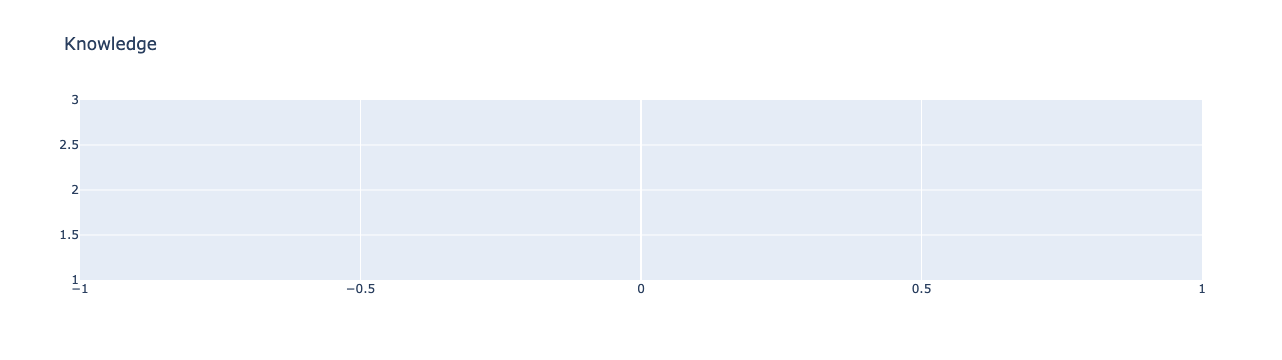

In [317]:
plot(m.time, [A.value], "Knowledge", ["A"])

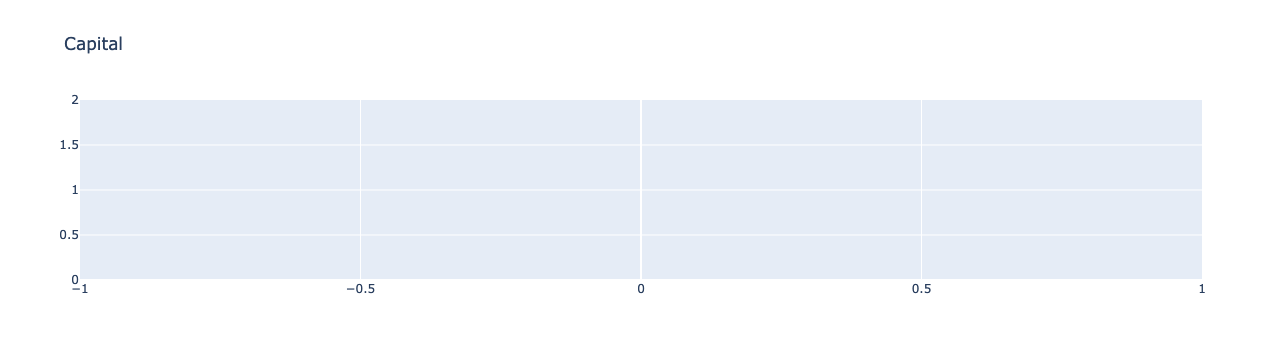

In [312]:
plot(m.time, [K.value], "Capital", ["K"])

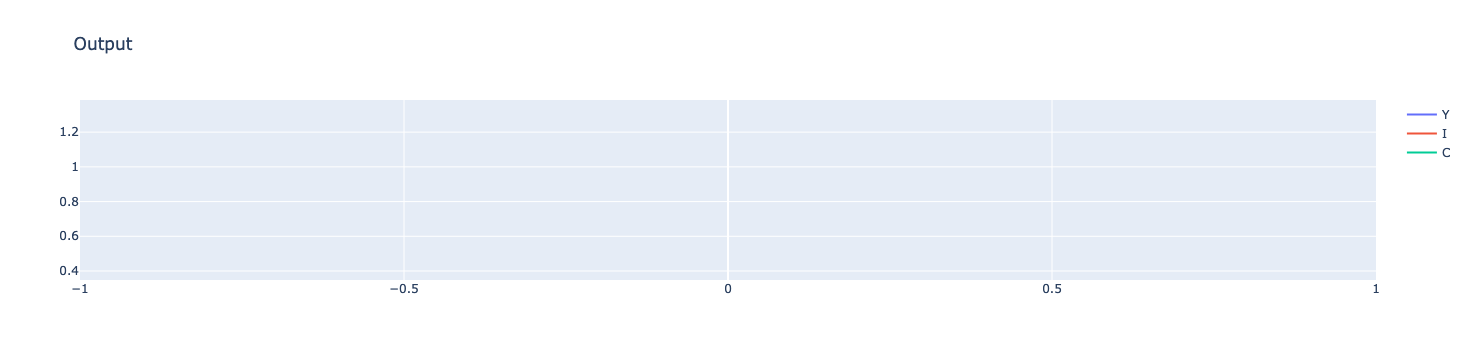

In [313]:
plot(m.time, [Y.value, I.value, C.value], "Output", ["Y", "I", "C"])

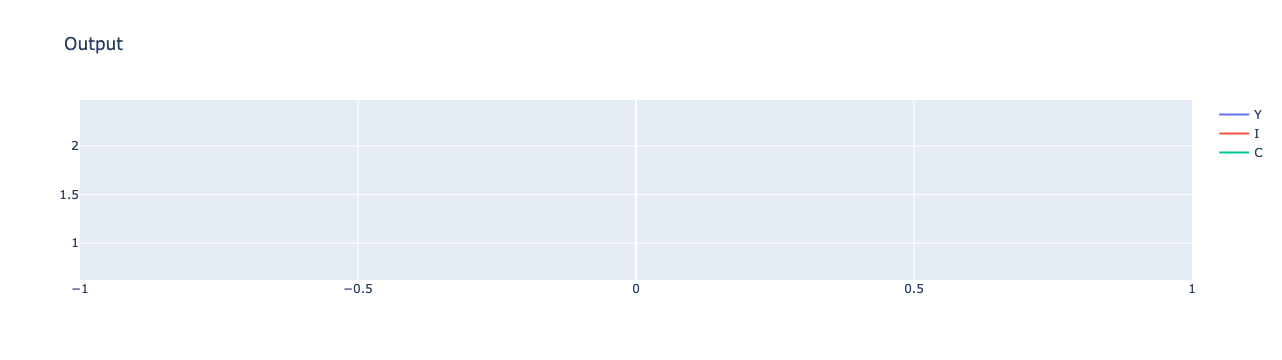

In [314]:
plot(m.time, [np.array(Y.value)/np.array(P.value), np.array(I.value)/np.array(P.value), np.array(C.value)/np.array(P.value)], "Output", ["Y", "I", "C"])

In [309]:
#Set to simulation mode
m.options.IMODE = 1
#Solve
m.solve(disp=False)

print("K at steady State: ", str(K.value))
print("A at steady State: ", str(A.value))
print("P at steady State: ", str(P.value))

K at steady State:  [1.0]
A at steady State:  [2.0]
P at steady State:  [0.56032632911]


In [25]:
#Initialize model
m = GEKKO(remote=False)
m.options.IMODE = 4

#time array
m.time = np.linspace(0, 100, 101)

#define constants
r = 0.2
#initialize variables
P = m.Var(value=10)
R = m.Var(value=5)

#Intermediate Variables
nr = m.Intermediate(P * r)

#Equations
m.Equations([P.dt() == -nr - 4])
m.Equations([R.dt() == nr])

m.solve(disp=False)

In [26]:
def plot(x, ys, title, labels):
    fig = go.Figure()
    fig.update_layout(
        #width=700, height=700, 
        title=title
    )
    
    for i in range(len(ys)):
        fig.add_trace(go.Scatter(x=x, y=ys[i],
                                mode='lines',
                                name=labels[i]))
    fig.show()

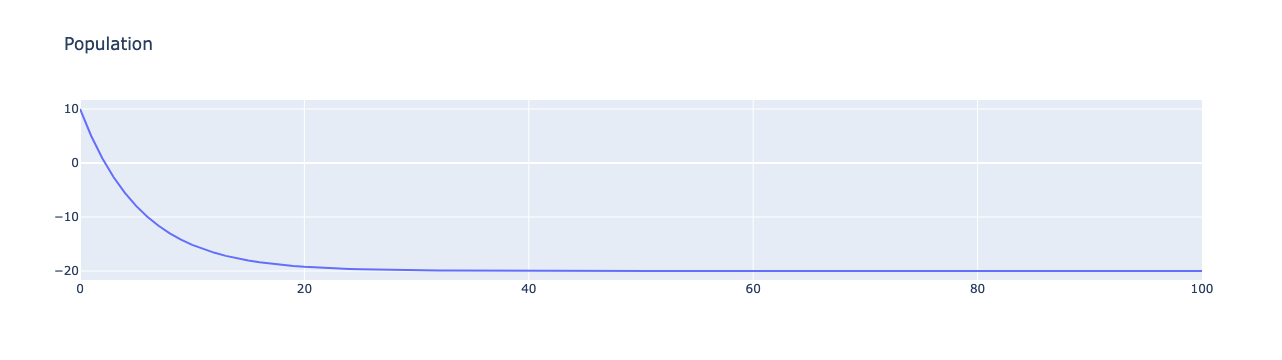

In [27]:
plot(m.time, [P.value], "Population", [""])

In [31]:
(-4.55)**0.5

(1.3061304501380646e-16+2.1330729007701543j)